In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(color_codes = True)
from scipy import stats 

In [4]:
# Load the dataset into a DataFrame
data = pd.read_csv('loan_data.csv')

In [5]:
#Here are what the columns represent from kaggle (https://www.kaggle.com/datasets/sahilnbajaj/loans-data):

#credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
#purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
#int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
#installment: The monthly installments owed by the borrower if the loan is funded.
#log.annual.inc: The natural log of the self-reported annual income of the borrower.
#dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
#fico: The FICO credit score of the borrower.
#days.with.cr.line: The number of days the borrower has had a credit line.
#revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
#revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
#inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
#delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
#pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [6]:
#top 5 rows of the dataset
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
data_Cleaned = data.dropna()
print(data_Cleaned)

      credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000

In [8]:
data_Cleaned = data.drop_duplicates()
print(data_Cleaned)

      credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000

In [9]:
# 1a. Mean Calculation for Interest rate
mean = sum(data['int.rate']) / len(data)
print(mean)

0.12264006055543955


In [10]:
# 1b. Mean Calculation for Installment
mean2 = sum(data['installment']) / len(data)
print(mean2)

319.08941323867197


In [11]:
# 2a.Medium Calculation for Interst rate
sorted_data = sorted(data['int.rate'])
n = len(sorted_data)
if n % 2 == 0:
    median = (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
else:
    median = sorted_data[n//2]

print(median)

0.1221


In [12]:
# 2b.Medium Calculation for Installments
sorted_data = sorted(data['installment'])
n = len(sorted_data)
if n % 2 == 0:
    median2 = (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
else:
    median2 = sorted_data[n//2]

print(median)

0.1221


In [13]:
#3a  Mode Calculation for Interest rate
mode = data['int.rate'].mode()[0]  # mode() returns a Series, so we select the first value
print(mode)

0.1253


In [14]:
#3b  Mode Calculation for Installments
mode2 = data['installment'].mode()[0]  # mode() returns a Series, so we select the first value
print(mode2) 


317.72


In [15]:
# 4a. Weighted Mean Calculation for Interest rate and Installments(Assuming weights are available in another column 'Weight')
weighted_mean = sum(data['int.rate'] * data['installment']) / sum(data['installment'])
print(weighted_mean)

0.12745052850229224


In [16]:
# 5a. Geometric Mean Calculation for Interest rates
geometric_mean = np.prod(data['int.rate']) ** (1 / len(data))
print(geometric_mean)

0.0


In [53]:
# 5b. Geometric Mean Calculation for Installments
geometric_mean2 = np.prod(data['installment']) ** (1 / len(data))
print(geometric_mean2)
#Will not result to an answer because this dataset is from the years 2007 to 2010

inf


In [18]:
# 6a. Percentiles Calculation for Interest rates (For the 25th percentile)
percentile_25 = np.percentile(data['int.rate'], 25)
print(percentile_25)


0.1039


In [19]:
# 6b. Percentiles Calculation for Installments (For the 25th percentile)
percentile_25_2 = np.percentile(data['installment'], 25)
print(percentile_25_2)


163.77


In [20]:
# 7a. Quartiles Calculation for Interest Rates
q1 = np.percentile(data['int.rate'], 25)
q2 = np.percentile(data['int.rate'], 50)
q3 = np.percentile(data['int.rate'], 75)
print("Quartiles:",q1,q2,q3)

Quartiles: 0.1039 0.1221 0.1407


In [21]:
# 7b. Quartiles Calculation for Installments
q1a = np.percentile(data['installment'], 25)
q2b = np.percentile(data['installment'], 50)
q3c = np.percentile(data['installment'], 75)
print("Quartiles:",q1a,q2b,q3c)

Quartiles: 163.77 268.95 432.7625


In [22]:
#8a. Range Calculation for Interest Rates
range_interestrate = max(data['int.rate']) - min(data['int.rate'])
print(range_interestrate)

0.1564


In [23]:
#8b. Range Calculation for Installment
range_installment = max(data['installment']) - min(data['installment'])
print(range_installment )

924.47


In [24]:
# 9a. Interquartile Range (IQR) Calculation for Interest Rates
iqr = q3 - q1
print(iqr)

0.036799999999999986


In [25]:
# 9b. Interquartile Range (IQR) Calculation for Installments
iqr_2 = q3c - q1a
print(iqr_2)

268.99249999999995


In [26]:
# 10a. Variance Calculation for Interest Rates
mean = sum(data['int.rate']) / len(data)  
variance = sum((x - mean) ** 2 for x in data['int.rate']) / len(data)
print(variance)
 # Recalculate mean as it's used in variance calculation


0.0007206854707417913


In [27]:
# 10b. Variance Calculation for Installments
mean2= sum(data['installment']) / len(data)  
variance2 = sum((x - mean2) ** 2 for x in data['installment']) / len(data)
print(variance2)

42874.04713266887


In [28]:
# 11a. Standard Deviation Calculation for Interest Rate
standard_deviation = variance ** 0.5
print(standard_deviation)


0.026845585684462006


In [29]:
# 11b. Standard Deviation Calculation for Installments
standard_deviation2 = variance2 ** 0.5
print(standard_deviation2)


207.06049148176209


In [30]:
# 12a. Coefficient of Variation Calculation for Interest Rate

coefficient_of_variation = (standard_deviation / mean) * 100
print(coefficient_of_variation)



21.889736161966777


In [31]:
# 12b. Coefficient of Variation Calculation for Installments

coefficient_of_variation2 = (standard_deviation2 / mean2) * 100
print(coefficient_of_variation2)


64.89105651615127


In [32]:
# 13a. Skewness Calculation for Interest Rate (Using Pearson's method)
skewness = 3 * (mean - median) / standard_deviation
print(skewness)


0.060351883745877764


In [33]:
# 13b. Skewness Calculation for Installations (Using Pearson's method)
skewness2 = 3 * (mean2 - median2) / standard_deviation2
print(skewness2)


0.7264458740515681


In [36]:
# 14a. Detecting Outliers for Interest Rate (Assuming outlier threshold is 1.5 times IQR)
outlier_threshold = 1.5 * iqr
outliers = [x for x in data['int.rate'] if x < q1 - outlier_threshold or x > q3 + outlier_threshold]
print(outliers)

[0.2086, 0.2011, 0.2011, 0.1979, 0.2017, 0.1982, 0.1982, 0.2017, 0.1982, 0.2017, 0.2086, 0.2121, 0.1982, 0.2121, 0.2086, 0.2121, 0.2052, 0.1982, 0.2121, 0.209, 0.2016, 0.2011, 0.2011, 0.2011, 0.2011, 0.2011, 0.1979, 0.2011, 0.1979, 0.1979, 0.1979, 0.2011, 0.2017, 0.1982, 0.2052, 0.2017, 0.2086, 0.2086, 0.1982, 0.1982, 0.2121, 0.2052, 0.2121, 0.2121, 0.2086, 0.2052, 0.209, 0.2017, 0.2164, 0.2164, 0.1979]


In [37]:
# 14b. Detecting Outliers for Installments (Assuming outlier threshold is 1.5 times IQR)
outlier_threshold = 1.5 * iqr_2
outliers2 = [x for x in data['installment'] if x < q1a - outlier_threshold or x > q3c + outlier_threshold]
print(outliers2)

[839.95, 859.07, 842.47, 862.97, 851.41, 876.83, 841.76, 880.78, 856.63, 879.92, 852.87, 895.56, 848.99, 837.67, 845.25, 865.78, 861.99, 869.7, 854.32, 876.36, 846.7, 869.7, 897.06, 836.66, 840.45, 836.66, 840.45, 871.16, 855.73, 847.53, 836.66, 836.66, 844.26, 894.61, 836.66, 867.29, 902.54, 878.94, 871.16, 855.73, 836.66, 866.16, 871.16, 863.42, 859.57, 836.66, 914.42, 840.45, 855.73, 902.5, 886.75, 914.42, 871.16, 882.84, 910.44, 855.73, 875.04, 904.88, 861.88, 874.66, 874.66, 870.39, 866.13, 878.94, 883.23, 887.54, 878.94, 840.83, 874.66, 883.23, 866.13, 870.39, 845.02, 866.13, 840.15, 849.22, 860.91, 852.57, 870.39, 836.66, 839.67, 870.39, 870.39, 861.88, 836.68, 844.28, 918.02, 840.83, 866.13, 836.51, 870.39, 852.57, 866.13, 874.66, 844.28, 874.66, 866.16, 847.9, 874.66, 840.83, 861.88, 866.13, 913.63, 836.66, 878.94, 836.66, 870.39, 843.78, 840.15, 844.28, 874.66, 861.88, 849.22, 878.94, 866.13, 844.28, 840.83, 836.66, 864.51, 836.66, 883.23, 870.39, 840.83, 860.34, 872.88, 840.

In [44]:
# 15a. Five Number Summary for Interest Rate
five_number_summary = {
    'Minimum': min(data['int.rate']),
    'Q1': q1,
    'Median': q2,
    'Q3': q3,
    'Maximum': max(data['int.rate'])}
print("Five Number Summary:", five_number_summary)

Five Number Summary: {'Minimum': 0.06, 'Q1': 0.1039, 'Median': 0.1221, 'Q3': 0.1407, 'Maximum': 0.2164}


In [45]:
# 15a. Five Number Summary for Installments
five_number_summary2 = {
    'Minimum': min(data['installment']),
    'Q1a': q1a,
    'Median': q2b,
    'Q3c': q3c,
    'Maximum': max(data['installment'])}
print("Five Number Summary2:", five_number_summary2)

Five Number Summary2: {'Minimum': 15.67, 'Q1a': 163.77, 'Median': 268.95, 'Q3c': 432.7625, 'Maximum': 940.14}


In [51]:
# 16a. Covariance Calculation for Interest Rate (Assuming there's another variable 'Interest rate')
covariance = np.cov(data['int.rate'], data['installment'])[0][1]
print(covariance)

1.5351296712060478


In [52]:
# 16b. Covariance Calculation for Installments (Assuming there's another variable 'Installment')
covariance2 = np.cov(data['installment'], data['int.rate'])[0][1]
print(covariance2)

1.5351296712060478


In [54]:
np.random.seed(0)
data = {
    'credit.policy': np.random.randint(0, 2, size=1000),
    'purpose': np.random.choice(['credit_card', 'debt_consolidation', 'educational', 'major_purchase', 'small_business', 'all_other'], size=1000),
    'int.rate': np.random.uniform(0.05, 0.25, size=1000),
    'installment': np.random.uniform(50, 500, size=1000),
    'log.annual.inc': np.random.uniform(9, 12, size=1000),
    'dti': np.random.uniform(0, 50, size=1000),
    'fico': np.random.randint(500, 850, size=1000),
    'days.with.cr.line': np.random.randint(100, 5000, size=1000),
    'revol.bal': np.random.randint(0, 100000, size=1000),
    'revol.util': np.random.uniform(0, 1, size=1000),
    'inq.last.6mths': np.random.randint(0, 10, size=1000),
    'delinq.2yrs': np.random.randint(0, 5, size=1000),
    'pub.rec': np.random.randint(0, 3, size=1000)
}

df = pd.DataFrame(data)

In [55]:
sns.set_style("whitegrid")

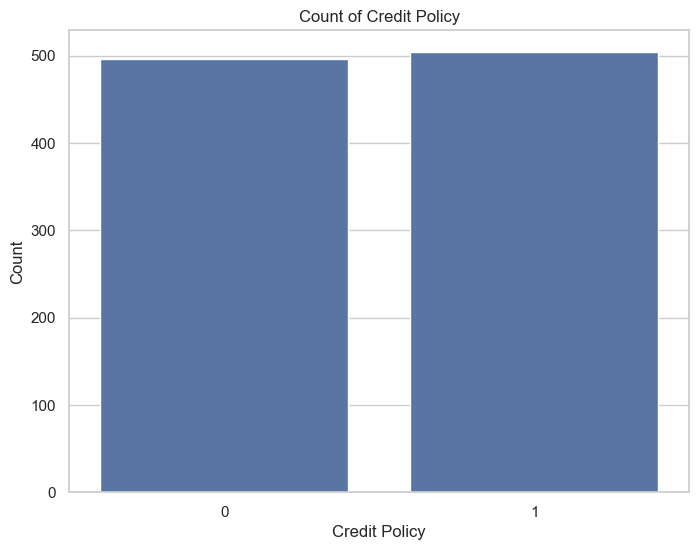

In [67]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='credit.policy')
plt.xlabel('Credit Policy')
plt.ylabel('Count')
plt.title('Count of Credit Policy')
plt.show()

-**The Count of Credit Policy, this graph shows a balanced distribution between customers that meeet the credit policy and between customers who don't.

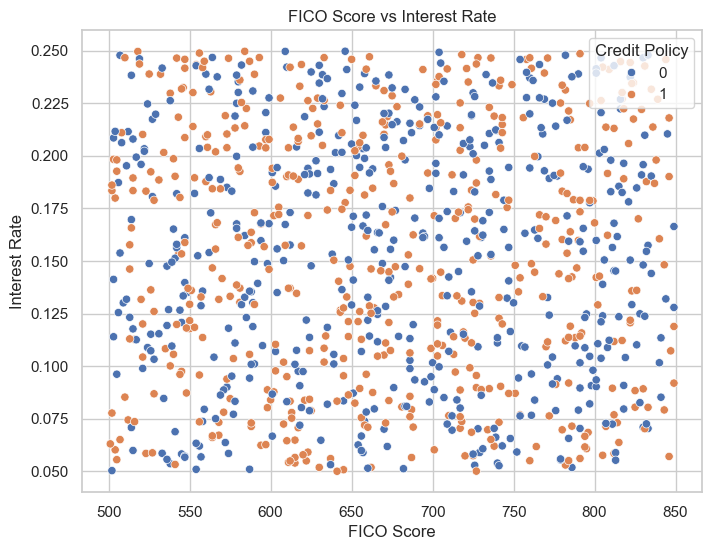

In [58]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='fico', y='int.rate', hue='credit.policy')
plt.title('FICO Score vs Interest Rate')
plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')
plt.legend(title='Credit Policy', loc='upper right')
plt.show()

-**The graph of the FISCO Score vs Interest Rate shows a trend of lower intersrt rate for borrowers with a high FISCO credit score.

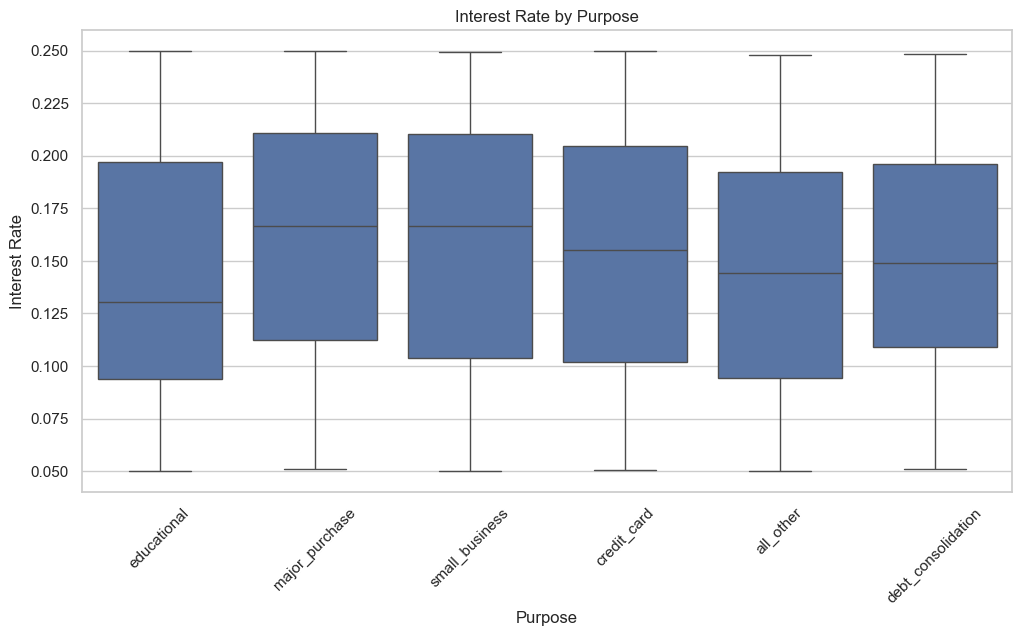

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='purpose', y='int.rate')
plt.title('Interest Rate by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45)
plt.show()

-** This box plot shows that small business have a higher interest rates when compared the the other loan purposes.

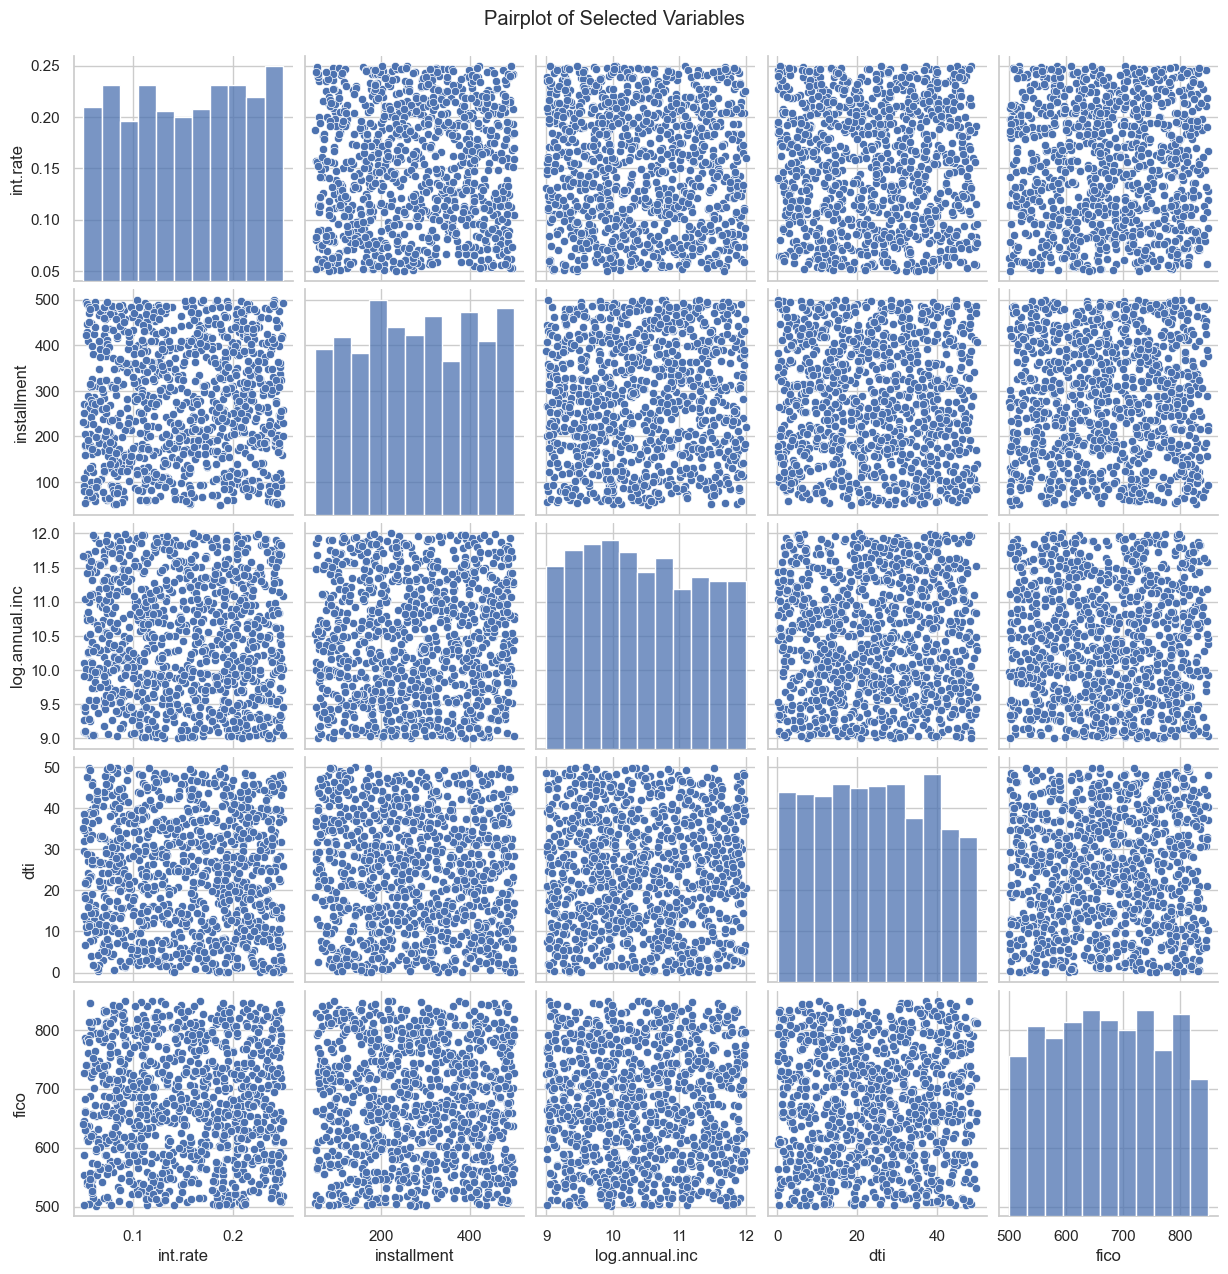

In [60]:
selected_vars = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico']
sns.pairplot(df[selected_vars])
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()

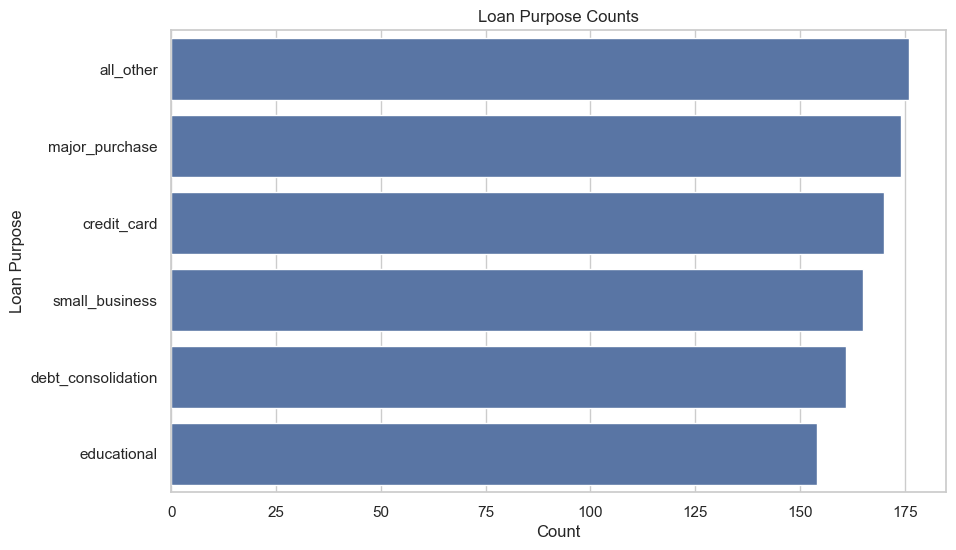

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='purpose', order=df['purpose'].value_counts().index)
plt.title('Loan Purpose Counts')
plt.xlabel('Count')
plt.ylabel('Loan Purpose')
plt.show()

_**The Loan Purpose Counts is a bar plot graph that shows the distribution of loan purposes.It also indicates that "All other" is the most common purpose of loan.

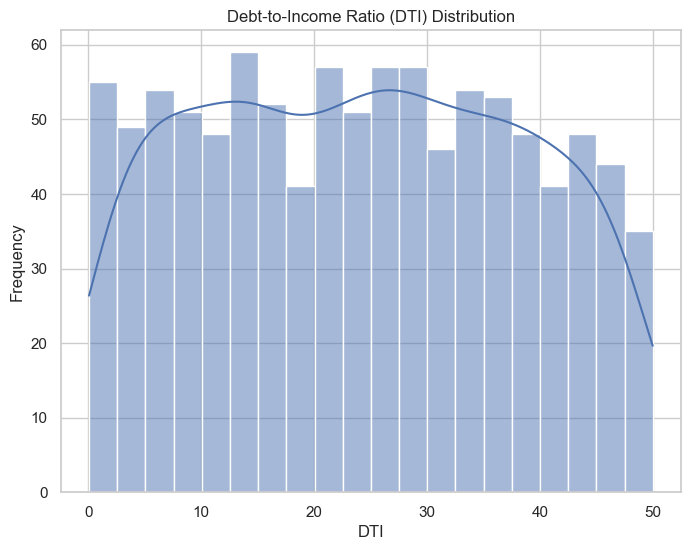

In [62]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='dti', bins=20, kde=True)
plt.title('Debt-to-Income Ratio (DTI) Distribution')
plt.xlabel('DTI')
plt.ylabel('Frequency')
plt.show()

_** Debt-to Income Ratio (DTI)Distribution is a histogram that shows the distribution of debt-to-icome ratios among borrowers. Most of the borrowers have low DTI ratios.

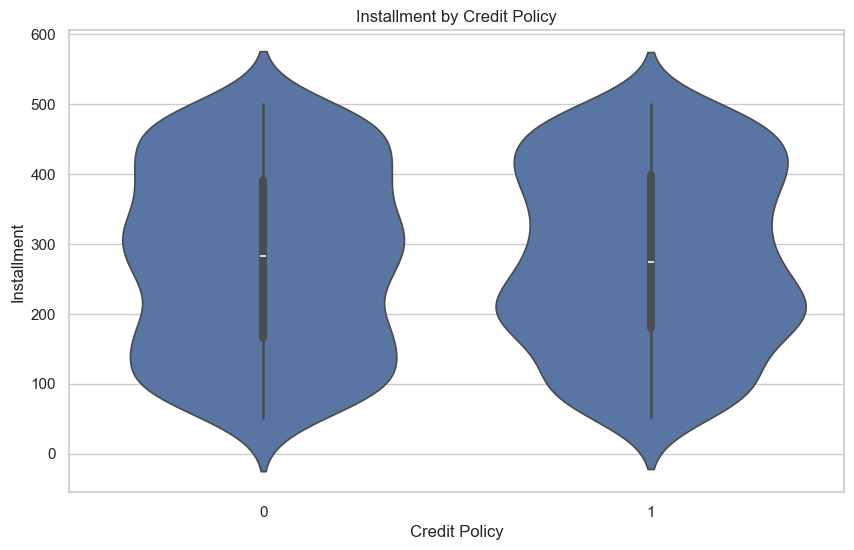

In [63]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='credit.policy', y='installment')
plt.title('Installment by Credit Policy')
plt.xlabel('Credit Policy')
plt.ylabel('Installment')
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.show()

_** The above graph is Called a violin Plot, this graph shows how the monthly installments owed by borrowers are distributed based on if they meeet the credit policy or not.

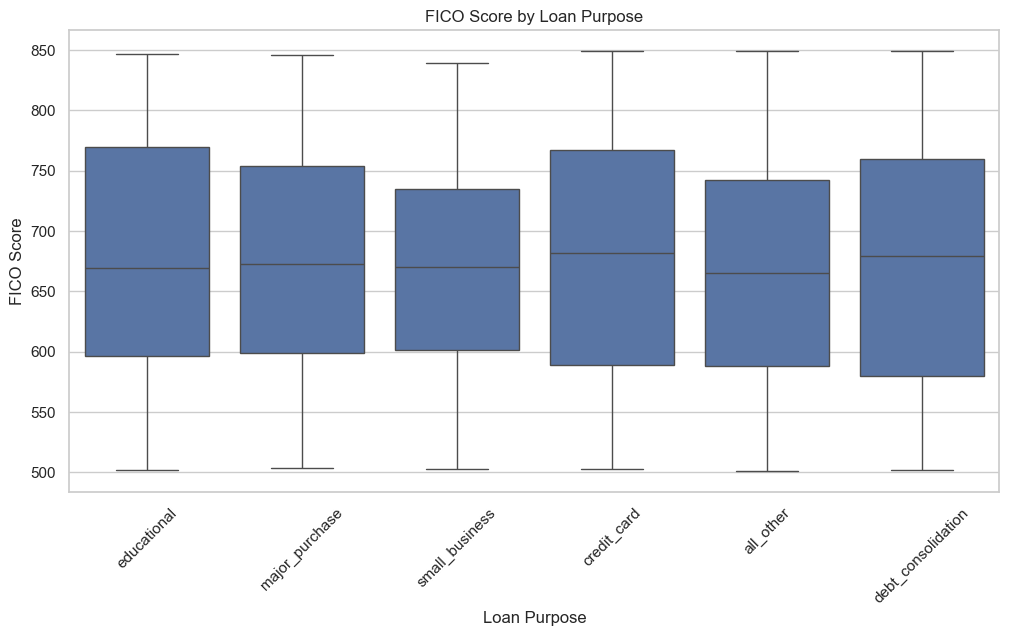

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='purpose', y='fico')
plt.title('FICO Score by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('FICO Score')
plt.xticks(rotation=45)
plt.show()

_** The FISCO Score by Loan Purpose, is a boxplot that illustrates the variation in FISCO scores amomg the diffrent purposes.

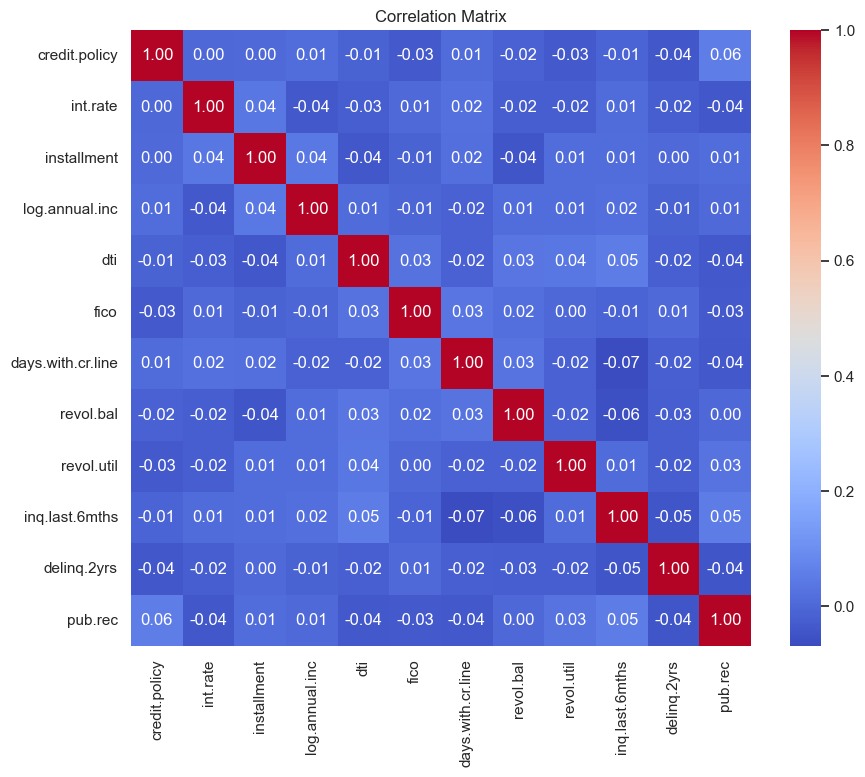

In [66]:
numeric_cols = df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

_** The Correlation Matrix is a heatmap that illustrates the relationship between numeric variables. Installments and loan amount have a stronger correlation, while the others show a weakert corrrelation.

## Reflection
The data I chose for the previous assignment was a Webtoons data set that showed the different genres and rating of the Webtoon books/comics. From the analysis done, I noticed that more people enjoyed romance, drama books based on the ratings. For the current assignment, the data set I chose is for Loans, this data shows the loan period of 2007-2010, and how long the lenders paid pack their loans and the instalment payments. I found working with Excel slightly easier as I am familiar with excel, and python a bit challenging as I did not have any background knowledge prior to this class. I think in the workspace I would be more likely to use Excel as most people use it, but if I am required to use python I wouldn’t mind. I would just need to do short courses and equip myself better. If I were to do this assignment all over, I would have started as soon as I got the assignment, so I could pace myself better. The gaps in my stats/programming knowledge are that I did not have any prior knowledge in statistics and programming. So, I had to watch a couple of YouTube videos. These assignments have taught me two ways in which descriptive statistics could be done on data.

## Github Link

https://github.com/Blessed-04/Learning-From-Data
